https://github.com/chandan450/MNIST-Handwritten-Digit-Classification/blob/master/MNIST_Digit_Recognizer.ipynb

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

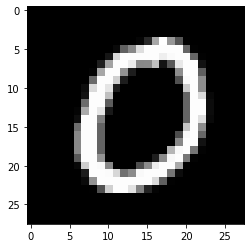

In [ ]:
plt.imshow(x_train[13216], cmap=plt.get_cmap('gray'))

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train_ohe[101]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train_ohe, validation_data=(x_test,y_test_ohe), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 9ms/step - loss: 1.1809 - accuracy: 0.8886 - val_loss: 0.0786 - val_accuracy: 0.9739
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.0915 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.0737 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0642 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0878 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0737 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0999 - val_ac

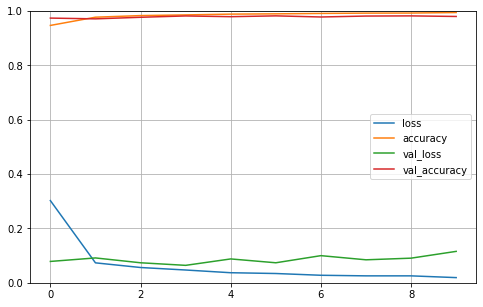

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()